In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import gdown

# Data import

In [ ]:
# Uber Fares Dataset NYC: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset/data

file_url = 'https://drive.google.com/file/d/1GhiGWj029V5LasBwDDLroaso3H_bCMBw/view?usp=sharing'
file_id = file_url.split('/')[-2]
download_url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(download_url, output='downloaded_file', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1GhiGWj029V5LasBwDDLroaso3H_bCMBw
To: /content/downloaded_file
100%|██████████| 25.3M/25.3M [00:00<00:00, 151MB/s]


'downloaded_file'

In [ ]:
df = pd.read_csv('downloaded_file')

In [ ]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Duration
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2097.9,282.8
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,3140.6,426.4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,6586.7,804.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,2415.0,210.7
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4995.0,437.0
...,...,...,...,...,...,...,...,...,...,...,...
195852,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,869.8,136.4
195853,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,2657.5,347.5
195854,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,15649.8,1328.2
195855,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,4023.5,421.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195857 entries, 0 to 195856
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         195857 non-null  int64  
 1   key                195857 non-null  object 
 2   fare_amount        195857 non-null  float64
 3   pickup_datetime    195857 non-null  object 
 4   pickup_longitude   195857 non-null  float64
 5   pickup_latitude    195857 non-null  float64
 6   dropoff_longitude  195857 non-null  float64
 7   dropoff_latitude   195857 non-null  float64
 8   passenger_count    195857 non-null  int64  
 9   Distance           195851 non-null  float64
 10  Duration           195851 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 16.4+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Distance             6
Duration             6
dtype: int64

# Generate Time Features

In [ ]:
#Formatting pickup_datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

#Extracting day fo the week, month and year
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
df['day_number'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year

In [ ]:
#Function to add daytime(morning/afternoon/evening/night)
def daytime(hour):
  if 5<= hour < 12:
    return 'morning'
  elif 12 <= hour <17:
    return 'afternoon'
  elif 17 <=hour <21:
    return 'evening'
  else:
    return 'night'

In [ ]:
#Applying the function
df['daytime'] = df['pickup_datetime'].dt.hour.apply(daytime)

In [ ]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Duration,day_of_week,day_number,hour,month,year,daytime
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2097.9,282.8,Thursday,7,19,5,2015,evening
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,3140.6,426.4,Friday,17,20,7,2009,evening
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,6586.7,804.0,Monday,24,21,8,2009,night
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2415.0,210.7,Friday,26,8,6,2009,morning
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4995.0,437.0,Thursday,28,17,8,2014,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195852,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,869.8,136.4,Sunday,28,10,10,2012,morning
195853,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2657.5,347.5,Friday,14,1,3,2014,night
195854,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,15649.8,1328.2,Monday,29,0,6,2009,night
195855,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,4023.5,421.9,Wednesday,20,14,5,2015,afternoon


# Data Cleaning - Consistency of Data - Remove Outliers

In [ ]:
# checking missing values
missing_fare = df['fare_amount'].isnull().sum()
missing_distance = df['Distance'].isnull().sum()
zero_fare = (df['fare_amount'] == 0).sum()
zero_distance = (df['Distance'] == 0).sum()

print(f"Missing fare amount: {missing_fare}")
print(f"Missing distance: {missing_distance}")
print(f"Zero fare amount: {zero_fare}")
print(f"Zero distance: {zero_distance}")

# Dropping zeros
df = df.dropna(subset=['fare_amount', 'Distance'])
df = df[df['fare_amount'] > 1] ## 1 dollar
df = df[df['Distance'] > 500] ## 500 meters

Missing fare amount: 0
Missing distance: 6
Zero fare amount: 3
Zero distance: 2240


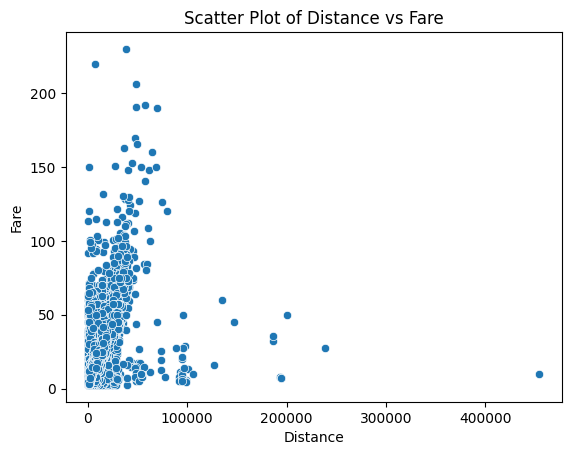

In [ ]:
sns.scatterplot(data=df, x='Distance', y='fare_amount')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.title('Scatter Plot of Distance vs Fare')
plt.show()

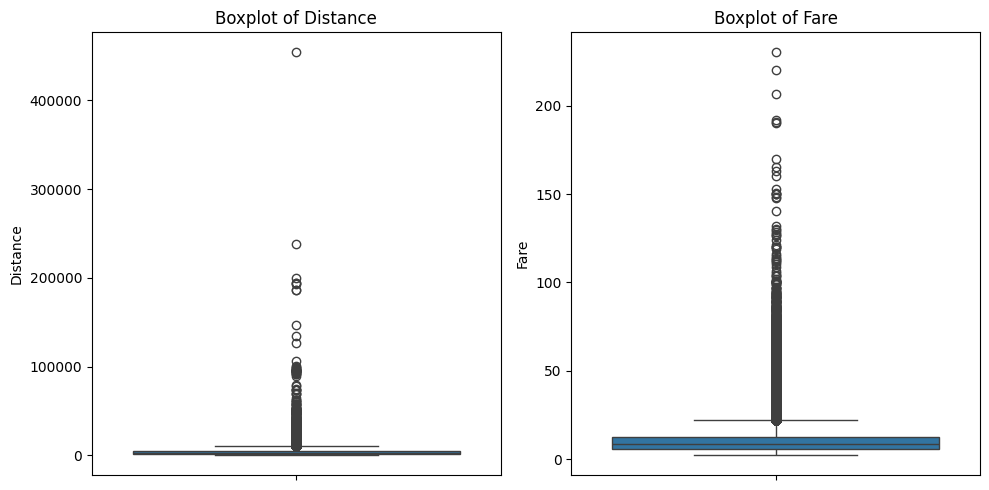

In [ ]:
# Create a boxplot for Distance
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Distance')
plt.title('Boxplot of Distance')
plt.ylabel('Distance')

# Create a boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='fare_amount')
plt.title('Boxplot of Fare')
plt.ylabel('Fare')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate Q1, Q3, and IQR for Distance
Q1_distance = df['Distance'].quantile(0.25)
Q3_distance = df['Distance'].quantile(0.75)
IQR_distance = Q3_distance - Q1_distance

lower_bound_distance = Q1_distance - 20 * IQR_distance
upper_bound_distance = Q3_distance + 20 * IQR_distance

# Calculate Q1, Q3, and IQR for Fare
Q1_fare = df['fare_amount'].quantile(0.25)
Q3_fare = df['fare_amount'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Calculate the lower and upper bounds for Fare
lower_bound_fare = Q1_fare - 20 * IQR_fare
upper_bound_fare = Q3_fare + 20 * IQR_fare

# Filter the DataFrame to remove outliers
df_filtered = df[
    (df['Distance'] >= lower_bound_distance) & (df['Distance'] <= upper_bound_distance) &
    (df['fare_amount'] >= lower_bound_fare) & (df['fare_amount'] <= upper_bound_fare)
]


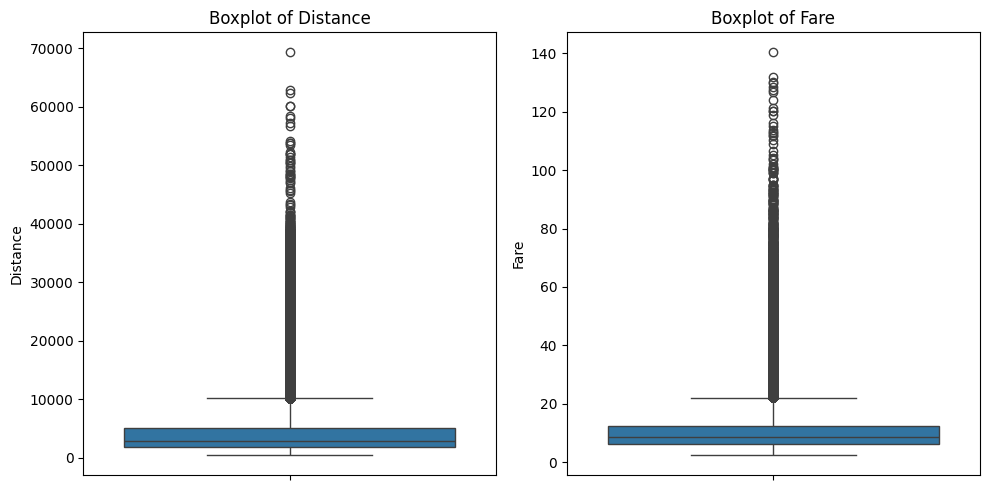

In [ ]:
# Create a boxplot for Distance
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_filtered, y='Distance')
plt.title('Boxplot of Distance')
plt.ylabel('Distance')

# Create a boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered, y='fare_amount')
plt.title('Boxplot of Fare')
plt.ylabel('Fare')

# Show the plot
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

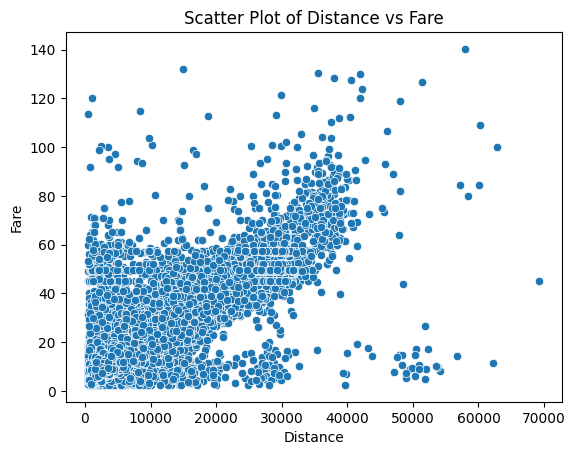

In [ ]:
sns.scatterplot(data=df_filtered, x='Distance', y='fare_amount')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.title('Scatter Plot of Distance vs Fare')
plt.savefig('scatter_plot_distance_vs_fare.png')
files.download('scatter_plot_distance_vs_fare.png')
plt.show()

In [ ]:
df_filtered.sort_values(by='fare_amount')

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Duration,day_of_week,day_number,hour,month,year,daytime
40779,39414857,2011-12-18 13:04:00.000000120,2.50,2011-12-18 13:04:00+00:00,-73.971683,40.723425,-73.974267,40.723273,2,2646.7,335.8,Sunday,18,13,12,2011,afternoon
152312,35362703,2013-08-15 12:06:00.000000173,2.50,2013-08-15 12:06:00+00:00,-73.998722,40.717183,-74.002835,40.724220,1,1331.8,179.3,Thursday,15,12,8,2013,afternoon
152295,20677500,2009-08-11 16:29:24.0000001,2.50,2009-08-11 16:29:24+00:00,-73.960811,40.769619,-73.981951,40.743184,1,4971.0,488.2,Tuesday,11,16,8,2009,afternoon
6814,22288684,2014-05-16 17:24:49.0000001,2.50,2014-05-16 17:24:49+00:00,-73.955531,40.804307,-73.938120,40.800348,1,1808.9,215.1,Friday,16,17,5,2014,evening
23955,47725882,2014-06-16 09:34:24.0000003,2.50,2014-06-16 09:34:24+00:00,-73.953151,40.768213,-73.974192,40.751961,1,3578.6,338.9,Monday,16,9,6,2014,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56851,20059639,2014-12-15 20:42:00.00000048,128.33,2014-12-15 20:42:00+00:00,-73.877080,40.772737,-73.671927,40.989375,1,37953.5,2173.3,Monday,15,20,12,2014,evening
136012,45355664,2012-11-23 19:02:30.0000003,129.80,2012-11-23 19:02:30+00:00,-73.874480,40.774023,-73.832862,41.059760,1,41919.8,2363.4,Friday,23,19,11,2012,evening
190432,34209729,2013-11-22 13:07:00.000000103,130.25,2013-11-22 13:07:00+00:00,-73.982272,40.763447,-74.177182,40.695032,1,35602.6,2643.7,Friday,22,13,11,2013,afternoon
93374,48830028,2013-08-14 05:01:45.0000001,131.93,2013-08-14 05:01:45+00:00,-73.977315,40.750161,-73.865338,40.770652,1,15018.9,1090.8,Wednesday,14,5,8,2013,morning


In [ ]:
day_map = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
df_filtered['day_of_week'] = df_filtered['day_of_week'].map(day_map)

<ipython-input-452-a2fac6425e6b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = df_filtered['day_of_week'].map(day_map)


In [ ]:
df_filtered = df_filtered[df_filtered['fare_amount']>3.0]

# Feature to be modeled : Fare

In [ ]:
df_filtered

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Duration,day_of_week,day_number,hour,month,year,daytime
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2097.9,282.8,4,7,19,5,2015,evening
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,3140.6,426.4,5,17,20,7,2009,evening
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,6586.7,804.0,1,24,21,8,2009,night
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2415.0,210.7,5,26,8,6,2009,morning
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4995.0,437.0,4,28,17,8,2014,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195851,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1,1644.3,157.4,5,31,14,1,2014,afternoon
195853,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2657.5,347.5,5,14,1,3,2014,night
195854,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,15649.8,1328.2,1,29,0,6,2009,night
195855,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,4023.5,421.9,3,20,14,5,2015,afternoon


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

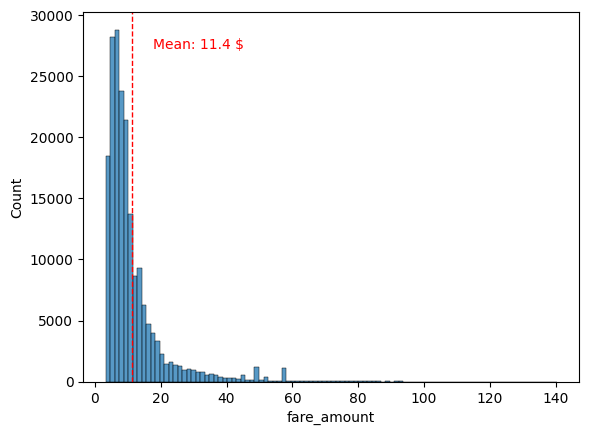

In [ ]:
mean_fare = df_filtered['fare_amount'].mean()


sns.histplot(data=df_filtered, x='fare_amount', bins=100)

# Add a vertical line at the mean
plt.axvline(mean_fare, color='r', linestyle='--', linewidth=1)
# Annotate the mean value on the plot
plt.text(mean_fare+20, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_fare:.1f} $', color='r', ha='center')

plt.savefig('Hist_fare.png')
files.download('Hist_fare.png')

plt.show()

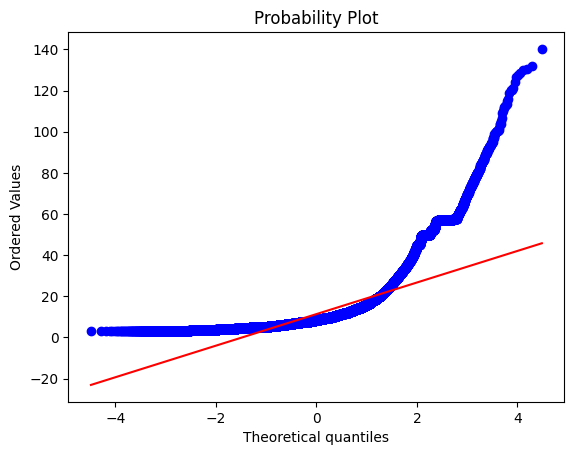

In [ ]:
# Q-Q plot for 'SalePrice'
from scipy import stats

stats.probplot(df_filtered['fare_amount'], plot=plt)
plt.show()

In [ ]:
# Apply log transformation (adding a small constant to avoid log(0)) to avoid highly skewed dataset
df_filtered['fare_amount_log'] = np.log(df_filtered['fare_amount'] + 1e-9)
df_filtered['fare_amount_log'].skew() # [ -2,2] -> correct

0.8811677059281398

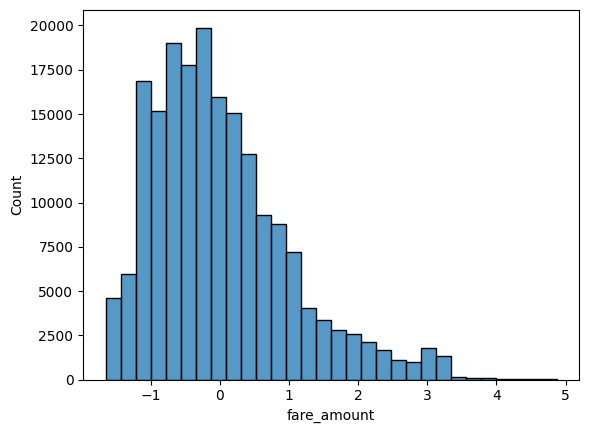

In [ ]:
# Applying log transformation to 'SalePrice' and standardizing it
log_transformed_fare = np.log1p(df_filtered['fare_amount']) # log1p(x) = ln(1 + x)
standardized_log_fare = (log_transformed_fare - log_transformed_fare.mean()) / log_transformed_fare.std(ddof=1)

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_fare, bins=30);

In [ ]:
ks_test_statistic_after_transformation, ks_p_value_after_transformation = stats.kstest(standardized_log_fare, 'norm')

ks_test_statistic_after_transformation, ks_p_value_after_transformation

# print the test result
if ks_p_value_after_transformation < 0.05:
    print('The test results indicate that the distribution of the fare is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of the fare is not significantly different from a normal distribution.')

The test results indicate that the distribution of the fare is significantly different from a normal distribution.


In [ ]:
df_filtered['fare_per_km'] = 1000*df_filtered['fare_amount'] / df_filtered['Distance']

# Convert pickup_datetime to decimal years
df_filtered['decimal_year'] = df_filtered['pickup_datetime'].dt.year + \
                              (df_filtered['pickup_datetime'].dt.dayofyear - 1 +
                               df_filtered['pickup_datetime'].dt.hour / 24 +
                               df_filtered['pickup_datetime'].dt.minute / (24 * 60) +
                               df_filtered['pickup_datetime'].dt.second / (24 * 60 * 60)) / \
                              (365 + df_filtered['pickup_datetime'].dt.is_leap_year.astype(int))

# Filter data for the year 2014 and the second week
df_2014 = df_filtered[(df_filtered['pickup_datetime'].dt.year == 2014) &
                                  (df_filtered['pickup_datetime'].dt.month == 5) ]


In [ ]:
df_2014.sort_values(by='decimal_year', inplace=True)

<ipython-input-574-87690cf61338>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014.sort_values(by='decimal_year', inplace=True)


In [ ]:
df_2014

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,...,day_number,hour,month,year,daytime,fare_amount_log,Distance_Class,decimal_year,cost_per_km,fare_per_km
98187,29873424,2014-05-01 00:09:00.000000130,17.5,2014-05-01 00:09:00+00:00,-73.994100,40.721037,-73.956987,40.766352,2,7001.7,...,1,0,5,2014,night,2.862201,"(5000, 10000]",2014.328784,2.499393,2.499393
147144,50082602,2014-05-01 00:13:00.000000122,22.5,2014-05-01 00:13:00+00:00,-74.008145,40.706142,-73.984967,40.768472,1,9043.7,...,1,0,5,2014,night,3.113515,"(5000, 10000]",2014.328792,2.487920,2.487920
17065,4383636,2014-05-01 00:19:00.0000002,7.5,2014-05-01 00:19:00+00:00,-73.992717,40.758192,-74.003962,40.734137,1,3033.8,...,1,0,5,2014,night,2.014903,"(0, 5000]",2014.328803,2.472147,2.472147
112547,20313118,2014-05-01 02:22:00.00000013,4.0,2014-05-01 02:22:00+00:00,-74.005458,40.741950,-74.007785,40.741080,1,699.3,...,1,2,5,2014,night,1.386294,"(0, 5000]",2014.329037,5.720006,5.720006
151421,15476958,2014-05-01 02:38:00.00000011,13.0,2014-05-01 02:38:00+00:00,-73.987845,40.738275,-73.983512,40.774560,1,5205.1,...,1,2,5,2014,night,2.564949,"(5000, 10000]",2014.329068,2.497550,2.497550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95712,35148181,2014-05-31 23:38:34.0000002,9.5,2014-05-31 23:38:34+00:00,-73.987277,40.761271,-73.974405,40.784063,1,3236.1,...,31,23,5,2014,night,2.251292,"(0, 5000]",2014.413658,2.935632,2.935632
8809,29318053,2014-05-31 23:48:58.0000005,9.5,2014-05-31 23:48:58+00:00,-73.968442,40.755783,-73.994347,40.745485,1,3428.5,...,31,23,5,2014,night,2.251292,"(0, 5000]",2014.413678,2.770891,2.770891
161949,18303841,2014-05-31 23:54:00.00000070,18.0,2014-05-31 23:54:00+00:00,-73.977453,40.779382,-73.977865,40.736692,5,7335.3,...,31,23,5,2014,night,2.890372,"(5000, 10000]",2014.413687,2.453887,2.453887
111716,31651176,2014-05-31 23:58:08.0000002,11.5,2014-05-31 23:58:08+00:00,-73.989085,40.726965,-73.995742,40.712211,1,2219.6,...,31,23,5,2014,night,2.442347,"(0, 5000]",2014.413695,5.181114,5.181114


<ipython-input-578-8c5af7be7187>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['moving_average'] = df_2014['fare_per_km'].rolling(window=window_size, min_periods=1).mean()


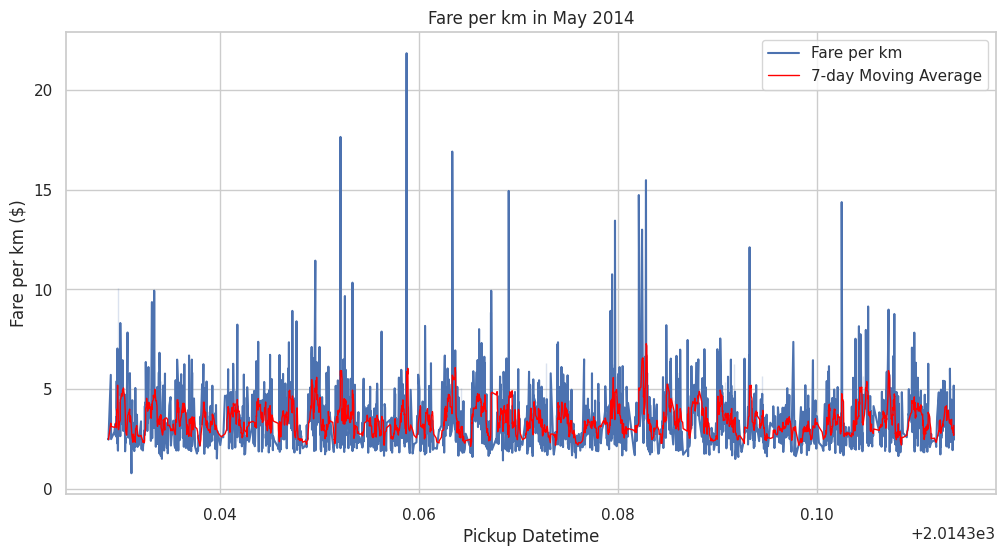

In [ ]:
# Calculate moving average
window_size = 7  # Adjust the window size as needed
df_2014['moving_average'] = df_2014['fare_per_km'].rolling(window=window_size, min_periods=1).mean()

# Plotting the time series for 2014
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plotting the time series
sns.lineplot(x='decimal_year', y='fare_per_km', data=df_2014, label='Fare per km')

# Plotting the moving average line
sns.lineplot(x='decimal_year', y='moving_average', data=df_2014, label=f'{window_size}-day Moving Average', color='red', linewidth=1)

# Adding labels and title
plt.xlabel('Pickup Datetime')
plt.ylabel('Fare per km ($)')
plt.title('Fare per km in May 2014')

# Saving the plot as an image
plt.savefig('Fare_TimeSeries.png')

plt.show()

# Explanatory Data Analysis

## Fare - Year

In [ ]:
df_final = df_filtered.copy()
df_final

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Duration,day_of_week,day_number,hour,month,year,daytime,fare_amount_log
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2097.9,282.8,4,7,19,5,2015,evening,2.014903
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,3140.6,426.4,5,17,20,7,2009,evening,2.041220
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,6586.7,804.0,1,24,21,8,2009,night,2.557227
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2415.0,210.7,5,26,8,6,2009,morning,1.667707
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4995.0,437.0,4,28,17,8,2014,evening,2.772589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195851,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1,1644.3,157.4,5,31,14,1,2014,afternoon,2.484907
195853,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2657.5,347.5,5,14,1,3,2014,night,2.014903
195854,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,15649.8,1328.2,1,29,0,6,2009,night,3.430756
195855,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,4023.5,421.9,3,20,14,5,2015,afternoon,2.674149


In [ ]:
df_final.sort_values(by='pickup_datetime', inplace=True)

In [ ]:
df_final.reset_index(inplace=True)

In [ ]:
average_fare_hour = df_final.groupby('hour')['fare_amount'].agg(['mean', 'std']).reset_index()
average_fare_hour.columns = ['hour', 'average_fare', 'sd']

average_fare_month = df_final.groupby('month')['fare_amount'].agg(['mean', 'std']).reset_index()
average_fare_month.columns = ['month', 'average_fare', 'sd']

average_fare_year = df_final.groupby('year')['fare_amount'].agg(['mean', 'std']).reset_index()
average_fare_year.columns = ['year', 'average_fare', 'sd']

average_fare_daytime = df_final.groupby('daytime')['fare_amount'].agg(['mean', 'std']).reset_index()
average_fare_daytime.columns = ['daytime', 'average_fare', 'sd']

average_fare_day_of_week = df_final.groupby('day_of_week')['fare_amount'].agg(['mean', 'std']).reset_index()
average_fare_day_of_week.columns = ['day_of_week', 'average_fare', 'sd']


print("Average Fare by Hour")
print(average_fare_hour)
print("\nAverage Fare by Month")
print(average_fare_month)
print("\nAverage Fare by Year")
print(average_fare_year)
print("\nAverage Fare by Daytime")
print(average_fare_daytime)
print("\nAverage Fare by Day of Week")
print(average_fare_day_of_week)

Average Fare by Hour
    hour  average_fare         sd
0      0     11.595931   8.596439
1      1     11.552849   8.259400
2      2     11.314790   7.978561
3      3     11.674498   8.127854
4      4     14.021574  11.425992
5      5     15.989865  15.111047
6      6     11.917248  11.412310
7      7     11.112858   9.864366
8      8     10.874874   8.922816
9      9     10.981318   8.747797
10    10     11.035161   9.001686
11    11     11.319910   9.518374
12    12     11.199322   9.012599
13    13     11.523099  10.100893
14    14     12.003944  10.728849
15    15     11.967668  10.908078
16    16     11.816902  10.551589
17    17     11.576051   9.941246
18    18     11.018111   8.798376
19    19     10.569861   8.198584
20    20     10.773079   8.429680
21    21     10.990119   8.524976
22    22     11.293697   8.624182
23    23     11.569249   8.798754

Average Fare by Month
    month  average_fare        sd
0       1     10.765144  8.999275
1       2     10.956323  8.881026
2   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

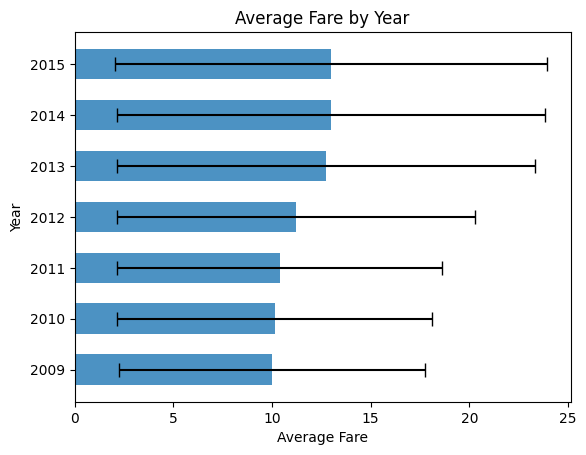

In [ ]:
# Convert data to numpy arrays
years = np.array(average_fare_year['year'])
average_fares = np.array(average_fare_year['average_fare'])
std_devs = np.array(average_fare_year['sd'])

# Create horizontal bar plot
fig, ax = plt.subplots()

bars = ax.barh(years, average_fares, xerr=std_devs, height=0.6, alpha=0.8, capsize=5)

plt.title('Average Fare by Year')
plt.ylabel('Year')
plt.xlabel('Average Fare')
plt.savefig('bar_plot_Mean_Fare_vs_Year.png')
files.download('bar_plot_Mean_Fare_vs_Year.png')
plt.show()

In [ ]:
from scipy.stats import f_oneway, stats

# Perform ANOVA
# Extract fare_per_km for each year into separate series
years = df_final['year'].unique()
data_per_year = [df_final[df_final['year'] == year]['fare_amount'] for year in years]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*data_per_year)

# Print the results
print('ANOVA results:')
print(f'F-statistic: {f_statistic:.2f}')
print(f'P-value: {p_value}')

ANOVA results:
F-statistic: 565.59
P-value: 0.0


p-value< 5%. Thus, there are statistically significant differences in the fare across the years 2009 to 2015. Thus the year is an important feature.

## Fare - Month

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

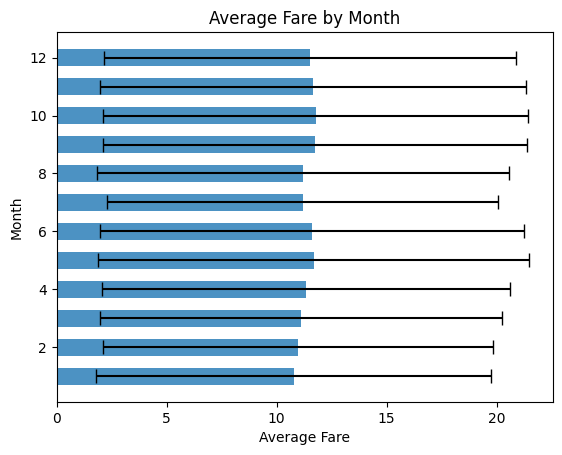

In [ ]:
# Convert data to numpy arrays
months = np.array(average_fare_month['month'])
average_fares = np.array(average_fare_month['average_fare'])
std_devs = np.array(average_fare_month['sd'])

# Create horizontal bar plot
fig, ax = plt.subplots()

bars = ax.barh(months, average_fares, xerr=std_devs, height=0.6, alpha=0.8, capsize=5)

plt.title('Average Fare by Month')
plt.ylabel('Month')
plt.xlabel('Average Fare')
plt.savefig('bar_plot_Mean_Fare_vs_Month.png')
files.download('bar_plot_Mean_Fare_vs_Month.png')
plt.show()

In [ ]:
# Perform ANOVA
# Extract fare_per_km for each year into separate series
months = df_final['month'].unique()
data_per_month = [df_final[df_final['month'] == month]['fare_amount'] for month in months]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*data_per_month)

# Print the results
print('ANOVA results:')
print(f'F-statistic: {f_statistic:.2f}')
print(f'P-value: {p_value}')

ANOVA results:
F-statistic: 20.69
P-value: 1.4381735004934844e-42


p-value< 5%. Thus, there are statistically significant differences in the fare across each month. Thus the month is an important feature.

## Fare - DayOfWeek

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

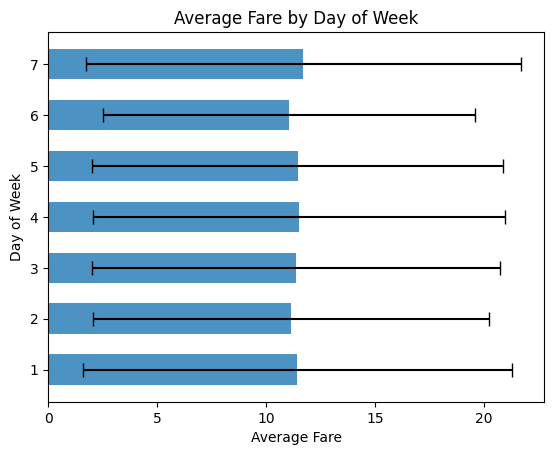

In [ ]:
# Convert data to numpy arrays
days = np.array(average_fare_day_of_week['day_of_week'])
average_fares = np.array(average_fare_day_of_week['average_fare'])
std_devs = np.array(average_fare_day_of_week['sd'])

# Create horizontal bar plot
fig, ax = plt.subplots()

bars = ax.barh(days, average_fares, xerr=std_devs, height=0.6, alpha=0.8, capsize=5)

plt.title('Average Fare by Day of Week')
plt.ylabel('Day of Week')
plt.xlabel('Average Fare')
plt.savefig('bar_plot_Mean_fare_vs_DayofWeek.png')
files.download('bar_plot_Mean_fare_vs_DayofWeek.png')
plt.show()

In [ ]:
# Perform ANOVA
# Extract fare_per_km for each year into separate series
days = df_final['day_of_week'].unique()
data_per_day = [df_final[df_final['day_of_week'] == day]['fare_amount'] for day in days]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*data_per_day)

# Print the results
print('ANOVA results:')
print(f'F-statistic: {f_statistic:.2f}')
print(f'P-value: {p_value}')

ANOVA results:
F-statistic: 16.04
P-value: 1.5303157154088925e-18


p-value< 5%. Thus, there are statistically significant differences in the fare  across the day of the week. Thus the day of the week is an important feature.

## Fare - TimeOfDay

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

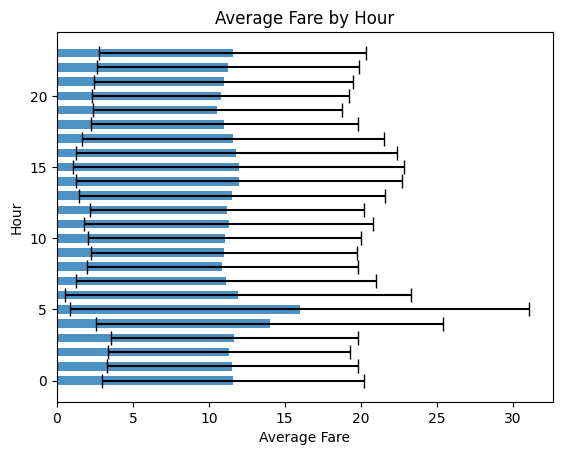

In [ ]:
# Convert data to numpy arrays
hours = np.array(average_fare_hour['hour'])
average_fares = np.array(average_fare_hour['average_fare'])
std_devs = np.array(average_fare_hour['sd'])

# Create horizontal bar plot
fig, ax = plt.subplots()

bars = ax.barh(hours, average_fares, xerr=std_devs, height=0.6, alpha=0.8, capsize=5)

plt.title('Average Fare by Hour')
plt.ylabel('Hour')
plt.xlabel('Average Fare')

plt.savefig('bar_plot_Mean_fare_vs_DayTime.png')
files.download('bar_plot_Mean_fare_vs_DayTime.png')

plt.show()

In [ ]:
# Perform ANOVA
# Extract fare_per_km for each year into separate series
hours = df_final['hour'].unique()
data_per_hour = [df_final[df_final['hour'] == hour]['fare_amount'] for hour in hours]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*data_per_hour)

# Print the results
print('ANOVA results:')
print(f'F-statistic: {f_statistic:.2f}')
print(f'P-value: {p_value}')

ANOVA results:
F-statistic: 43.16
P-value: 1.6254032458937958e-194


p-value< 5%. Thus, there are statistically significant differences in the fare  during the day. Thus the time in day is an important feature,.

## Fare - Distance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

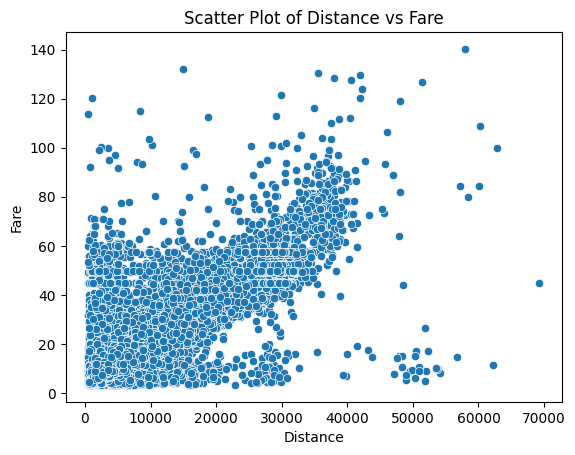

In [ ]:
sns.scatterplot(data=df_filtered, x='Distance', y='fare_amount')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.title('Scatter Plot of Distance vs Fare')
plt.savefig('scatter_plot_distance_vs_fare.png')
files.download('scatter_plot_distance_vs_fare.png')
plt.show()

In [ ]:
distance_bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 70000]
df_filtered['Distance_Class'] = pd.cut(df_filtered['Distance'], bins=distance_bins)

In [ ]:
average_fare_distance = df_filtered.groupby('Distance_Class')['fare_amount'].agg(['mean', 'std']).reset_index()
average_fare_distance.columns = ['Distance_Class', 'average_fare', 'sd']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

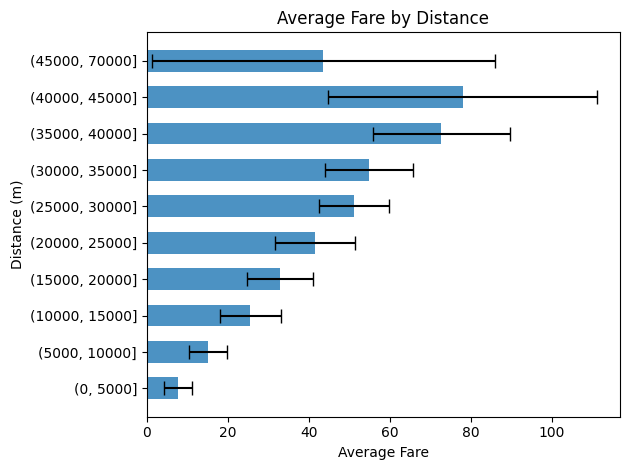

In [ ]:
# Convert data to numpy arrays
distances = np.array(average_fare_distance['Distance_Class']).astype(str)
average_fares = np.array(average_fare_distance['average_fare'])
std_devs = np.array(average_fare_distance['sd'])

# Create horizontal bar plot
fig, ax = plt.subplots()

bars = ax.barh(distances, average_fares, xerr=std_devs, height=0.6, alpha=0.8, capsize=5)

plt.title('Average Fare by Distance')
plt.ylabel('Distance (m)')
plt.xlabel('Average Fare')
plt.tight_layout()

plt.savefig('bar_plot_Mean_fare_vs_Distance.png')
files.download('bar_plot_Mean_fare_vs_Distance.png')

plt.show()

# Features investigation

In [ ]:
features = df_final [ ['year', 'month', 'day_of_week', 'hour', 'Distance', 'fare_amount' ]]
features

,year,month,day_of_week,hour,Distance,fare_amount
0,2009,1,4,1,3956.5,8.5
1,2009,1,4,1,6071.2,13.0
2,2009,1,4,2,4936.1,10.6
3,2009,1,4,2,7091.2,12.2
4,2009,1,4,2,3928.9,11.0
...,...,...,...,...,...,...
190598,2015,6,2,22,6276.2,18.5
190599,2015,6,2,23,12691.6,25.5
190600,2015,6,2,23,6058.6,20.0
190601,2015,6,2,23,2792.7,8.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

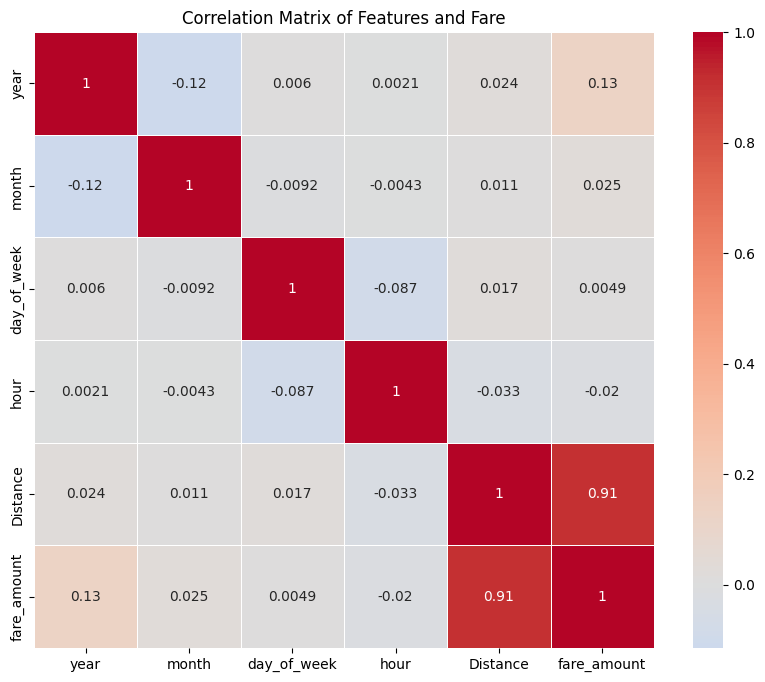

In [ ]:
correlation_matrix = features.corr()
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Features and Fare')
plt.savefig('correlation_matrix.png')
files.download('correlation_matrix.png')

plt.show()

# Preparing data - Feature Engineering

In [ ]:
features = df_final [ ['year', 'month', 'day_of_week', 'hour', 'Distance' ]]
features

,year,month,day_of_week,hour,Distance
0,2009,1,4,1,3956.5
1,2009,1,4,1,6071.2
2,2009,1,4,2,4936.1
3,2009,1,4,2,7091.2
4,2009,1,4,2,3928.9
...,...,...,...,...,...
190598,2015,6,2,22,6276.2
190599,2015,6,2,23,12691.6
190600,2015,6,2,23,6058.6
190601,2015,6,2,23,2792.7


In [ ]:
target = df_final['fare_amount']
target

0          8.5
1         13.0
2         10.6
3         12.2
4         11.0
          ... 
190598    18.5
190599    25.5
190600    20.0
190601     8.5
190602    27.0
Name: fare_amount, Length: 190603, dtype: float64

## Data Splitting


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [ ]:
X_train

,year,month,day_of_week,hour,Distance
88425,2012,1,5,15,1658.7
100725,2012,5,4,21,6152.9
95285,2012,3,6,14,3937.0
88136,2012,1,1,16,2799.6
46738,2010,8,4,8,11300.7
...,...,...,...,...,...
152315,2014,2,6,20,4182.1
176963,2014,12,3,18,1460.0
117952,2012,12,4,15,1273.4
173685,2014,11,3,9,4454.8


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming numerical_columns contains your numerical columns
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(X_train[['month', 'day_of_week', 'hour', 'Distance' ]])
Xtest_scaled = scaler.fit_transform(X_test[['month', 'day_of_week', 'hour', 'Distance' ]])

# Convert scaled_data back to a DataFrame
Xtrain_scaled_df = pd.DataFrame(Xtrain_scaled, columns =X_train[['month', 'day_of_week', 'hour', 'Distance' ]].columns ).reset_index(drop=True)
Xtest_scaled_df = pd.DataFrame(Xtest_scaled, columns =X_test[['month', 'day_of_week', 'hour', 'Distance' ]].columns).reset_index(drop=True)

In [ ]:
Xtrain_scaled_df

,month,day_of_week,hour,Distance
0,-1.534354,0.487385,0.231910,-0.583443
1,-0.372425,-0.026585,1.152917,0.327548
2,-0.953390,1.001355,0.078409,-0.121623
3,-1.534354,-1.568494,0.385411,-0.352179
4,0.499022,-0.026585,-0.842599,1.371026
...,...,...,...,...
152477,-1.243872,1.001355,0.999416,-0.071941
152478,1.660951,-0.540554,0.692414,-0.623721
152479,1.660951,-0.026585,0.231910,-0.661545
152480,1.370469,-0.540554,-0.689098,-0.016663


In [ ]:
X_train_cat_ord = pd.DataFrame(X_train['year']).reset_index(drop=True)
X_test_cat_ord = pd.DataFrame(X_test['year']).reset_index(drop=True)
mapping = [{2009: 0, 2010: 1, 2011: 2, 2012: 3, 2013: 4, 2014: 5, 2015: 6 }]

In [ ]:
X_train_cat_ord

,year
0,2012
1,2012
2,2012
3,2012
4,2010
...,...
152477,2014
152478,2014
152479,2012
152480,2014


In [ ]:
for index, col in enumerate(X_train_cat_ord.columns):
  X_train_cat_ord[col] = X_train_cat_ord[col].map(mapping[index])
  X_test_cat_ord[col] = X_test_cat_ord[col].map(mapping[index])

In [ ]:
X_train_cat_ord

,year
0,3
1,3
2,3
3,3
4,1
...,...
152477,5
152478,5
152479,3
152480,5


## Combine datasets

In [ ]:
X_train = pd.concat([X_train_cat_ord, Xtrain_scaled_df], axis=1)
X_test = pd.concat([X_test_cat_ord, Xtest_scaled_df], axis=1)

In [ ]:
X_train

,year,month,day_of_week,hour,Distance
0,3,-1.534354,0.487385,0.231910,-0.583443
1,3,-0.372425,-0.026585,1.152917,0.327548
2,3,-0.953390,1.001355,0.078409,-0.121623
3,3,-1.534354,-1.568494,0.385411,-0.352179
4,1,0.499022,-0.026585,-0.842599,1.371026
...,...,...,...,...,...
152477,5,-1.243872,1.001355,0.999416,-0.071941
152478,5,1.660951,-0.540554,0.692414,-0.623721
152479,3,1.660951,-0.026585,0.231910,-0.661545
152480,5,1.370469,-0.540554,-0.689098,-0.016663


# Fare modeling

## KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Instantiate the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=25)

# Fit the model to your training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 13.385695296350045
R^2 Score: 0.8553673978545392


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

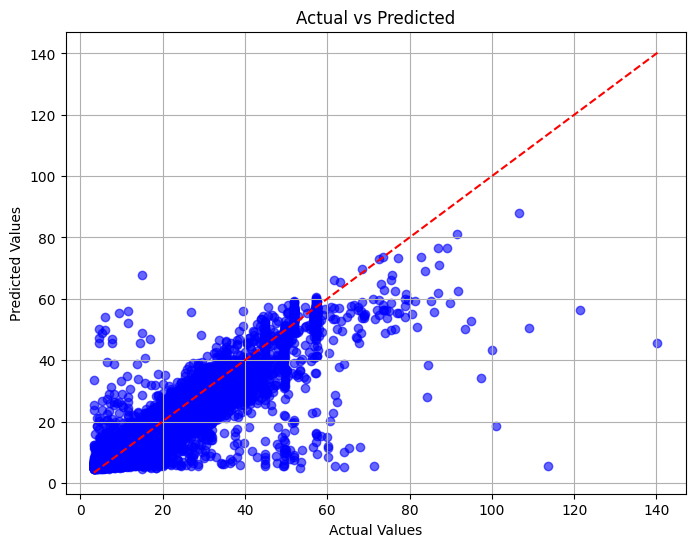

In [ ]:
# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.savefig('KNN_scatter.png')
files.download('KNN_scatter.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x600 with 0 Axes>

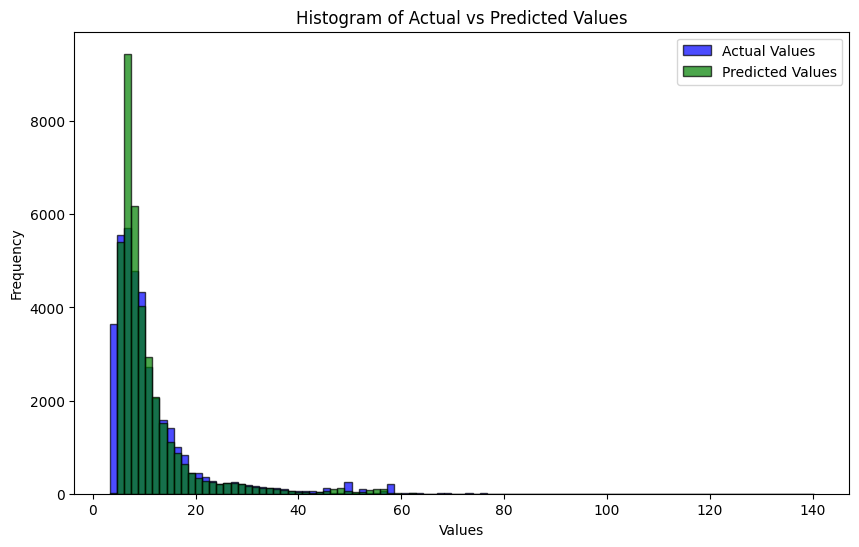

In [ ]:
# Plotting the histograms in one plot
plt.figure(figsize=(10, 6))

min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))

# Create bin edges
bins = np.linspace(min_value, max_value, 100)

# Plotting the histograms in one plot
plt.figure(figsize=(10, 6))

# Histogram of actual test values
plt.hist(y_test, bins=bins, alpha=0.7, color='blue', edgecolor='black', label='Actual Values')

# Histogram of predicted values
plt.hist(y_pred, bins=bins, alpha=0.7, color='green', edgecolor='black', label='Predicted Values')

plt.title('Histogram of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.savefig('KNN_hist.png')
files.download('KNN_hist.png')

plt.show()

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate the linear regression model
linear_regressor = LinearRegression()

# Fit the model to your training data
linear_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 15.037363623604886
R^2 Score: 0.8375211012847041


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

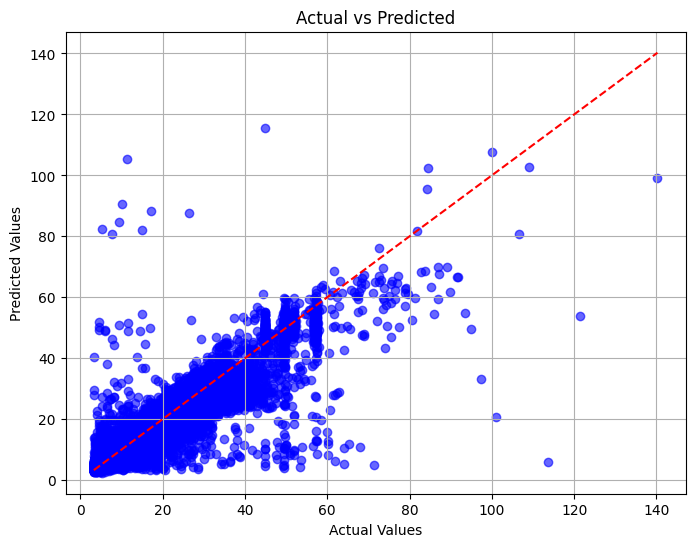

In [ ]:
# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.savefig('Linear_scatter.png')
files.download('Linear_scatter.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x600 with 0 Axes>

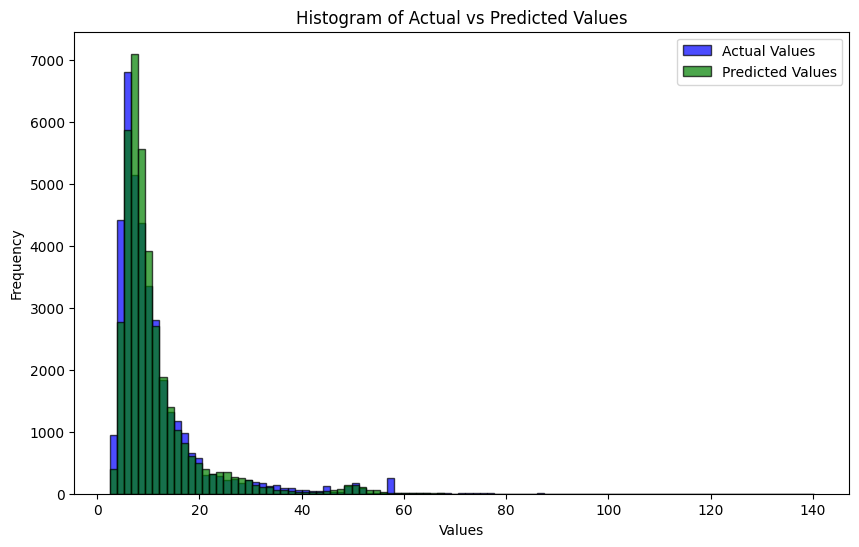

In [ ]:
# Plotting the histograms in one plot
plt.figure(figsize=(10, 6))

min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))

# Create bin edges
bins = np.linspace(min_value, max_value, 100)

# Plotting the histograms in one plot
plt.figure(figsize=(10, 6))

# Histogram of actual test values
plt.hist(y_test, bins=bins, alpha=0.7, color='blue', edgecolor='black', label='Actual Values')

# Histogram of predicted values
plt.hist(y_pred, bins=bins, alpha=0.7, color='green', edgecolor='black', label='Predicted Values')

plt.title('Histogram of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.savefig('Linear_hist.png')
files.download('Linear_hist.png')
plt.show()

## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the decision tree regressor
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=0)

# Fit the model to your training data
tree_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 14.15005005904327
R^2 Score: 0.8471085352521055


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

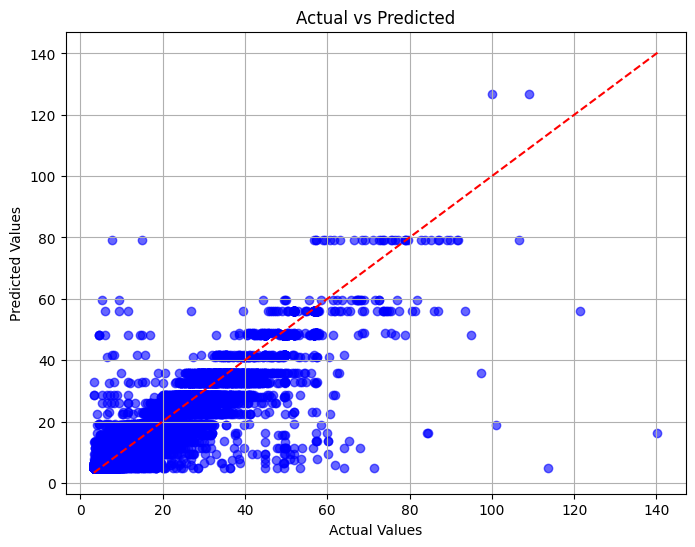

In [ ]:
# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.savefig('TR_scatter.png')
files.download('TR_scatter.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x600 with 0 Axes>

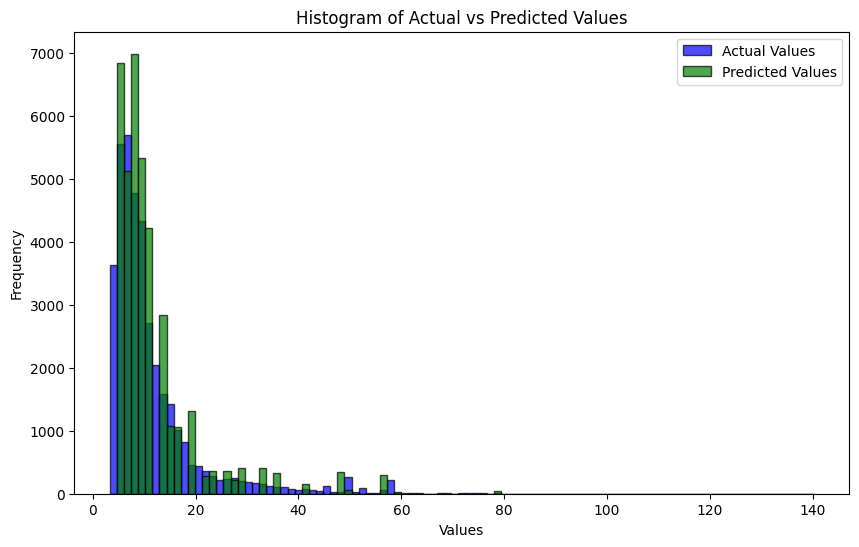

In [ ]:
# Plotting the histograms in one plot
plt.figure(figsize=(10, 6))

min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))

# Create bin edges
bins = np.linspace(min_value, max_value, 100)

# Plotting the histograms in one plot
plt.figure(figsize=(10, 6))

# Histogram of actual test values
plt.hist(y_test, bins=bins, alpha=0.7, color='blue', edgecolor='black', label='Actual Values')

# Histogram of predicted values
plt.hist(y_pred, bins=bins, alpha=0.7, color='green', edgecolor='black', label='Predicted Values')

plt.title('Histogram of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.savefig('TR_hist.png')
files.download('TR_hist.png')
plt.show()

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0)

# Fit the model to your training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 13.351081646522527
R^2 Score: 0.8557413987662191


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

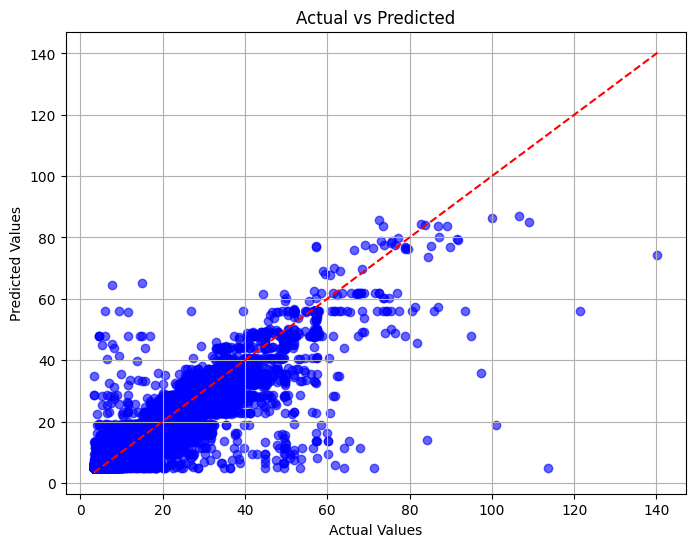

In [ ]:
# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.savefig('RF_scatter.png')
files.download('RF_scatter.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x600 with 0 Axes>

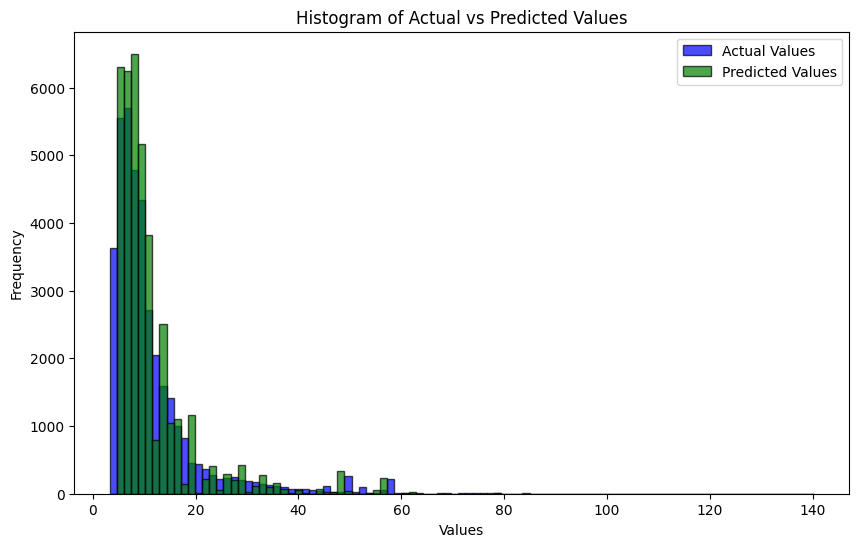

In [ ]:
# Plotting the histograms in one plot
plt.figure(figsize=(10, 6))

min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))

# Create bin edges
bins = np.linspace(min_value, max_value, 100)

# Plotting the histograms in one plot
plt.figure(figsize=(10, 6))

# Histogram of actual test values
plt.hist(y_test, bins=bins, alpha=0.7, color='blue', edgecolor='black', label='Actual Values')

# Histogram of predicted values
plt.hist(y_pred, bins=bins, alpha=0.7, color='green', edgecolor='black', label='Predicted Values')

plt.title('Histogram of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.savefig('RF_hist.png')
files.download('RF_hist.png')

plt.show()

In [ ]:
# Feature importance plot
feature_importances = rf_reg.feature_importances_
feature_names = X_train.columns

# Create a dataframe of feature importances for easier plotting
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.head()

,Feature,Importance
4,Distance,0.975703
0,year,0.024122
3,hour,0.000094
1,month,0.000078
2,day_of_week,0.000003


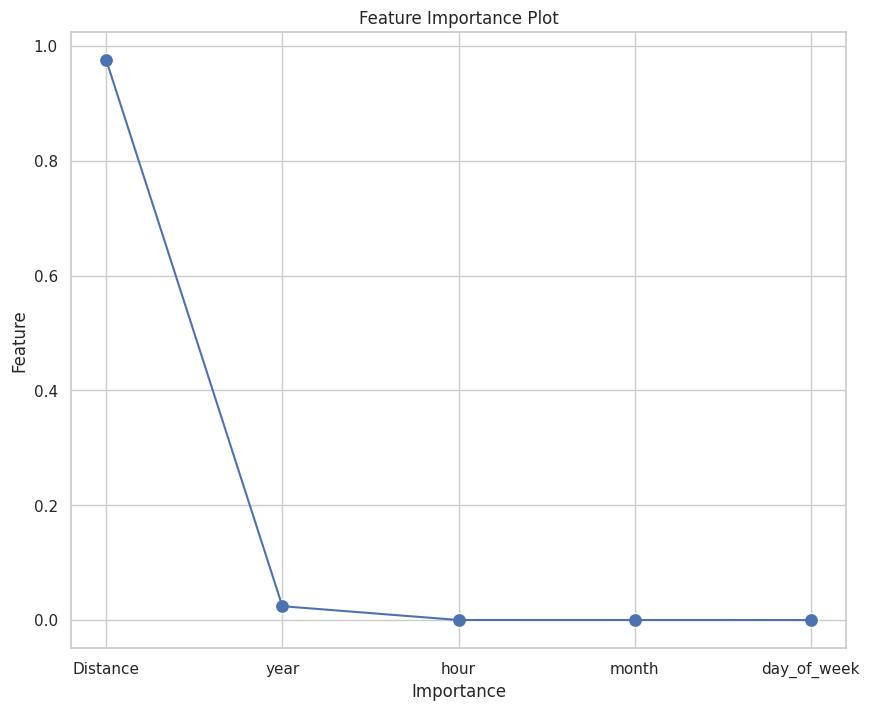

In [ ]:
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")  # Optional: for styling

# Create a scatter plot
sns.scatterplot(y='Importance', x='Feature', data=feature_importance_df, s=100)
sns.lineplot(y='Importance', x='Feature', data=feature_importance_df, sort=False, color='b')
# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')

# Show plot
plt.show()

# Ensemble Models and Hypemeter Tuning - Linear and Random Forest Regression

## Hypemeter Tuning - Random Forest Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 5]
}

# Instantiate the Random Forest regressor
rf_reg = RandomForestRegressor(random_state=0)

# Instantiate GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_reg, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5, verbose=1)

# Fit GridSearchCV to find the best parameters
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best CV MSE score:", -grid_search_rf.best_score_)

# Use the best estimator found by GridSearchCV
best_rf = grid_search_rf.best_estimator_

# Make predictions on the test data using the best Random Forest model
y_pred_rf_tuned = best_rf.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Random Forest: {'max_depth': 5, 'n_estimators': 200}
Best CV MSE score: 12.80136153962378


## Linear Regression Model

In [ ]:
# Instantiate the linear regression model
linear_regressor = LinearRegression()

# Fit the model to your training data
linear_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 15.037363623604886
R^2 Score: 0.8375211012847041


## Ensemble Tuned Models

In [ ]:
# Ensemble predictions: simple averaging with tuned models
y_pred_combined_tuned = y_pred_linear * 0.5 + y_pred_rf_tuned * 0.5

# Evaluate the ensemble model
mse_combined_tuned = mean_squared_error(y_test, y_pred_combined_tuned)
r2_combined_tuned = r2_score(y_test, y_pred_combined_tuned)

print(f"Tuned Ensemble Mean Squared Error: {mse_combined_tuned}")
print(f"Tuned Ensemble R^2 Score: {r2_combined_tuned}")

Tuned Ensemble Mean Squared Error: 13.459477165139216
Tuned Ensemble R^2 Score: 0.8545701838557234


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

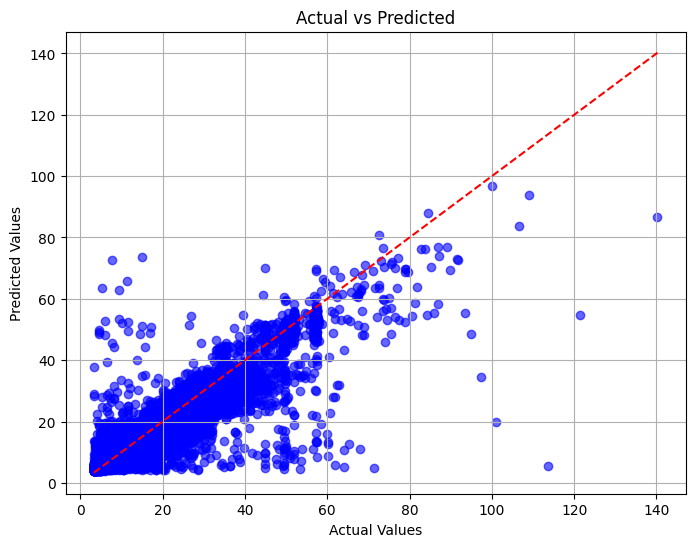

In [ ]:
# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_combined_tuned, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.savefig('ensemble_Linear_RF_scatter.png')
files.download('ensemble_Linear_RF_scatter.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x600 with 0 Axes>

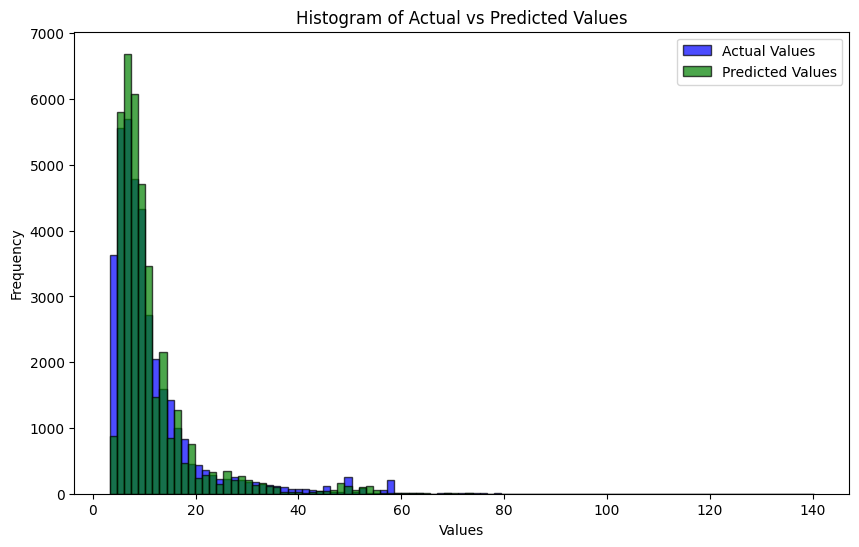

In [ ]:
# Plotting the histograms in one plot
plt.figure(figsize=(10, 6))

min_value = min(min(y_test), min(y_pred_combined))
max_value = max(max(y_test), max(y_pred_combined))

# Create bin edges
bins = np.linspace(min_value, max_value, 100)

# Plotting the histograms in one plot
plt.figure(figsize=(10, 6))

# Histogram of actual test values
plt.hist(y_test, bins=bins, alpha=0.7, color='blue', edgecolor='black', label='Actual Values')

# Histogram of predicted values
plt.hist(y_pred_combined_tuned, bins=bins, alpha=0.7, color='green', edgecolor='black', label='Predicted Values')

plt.title('Histogram of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.savefig('ensemble_Linear_RF_hist.png')
files.download('ensemble_Linear_RF_hist.png')
plt.show()

In [ ]:
residuals = y_test - y_pred_combined_tuned
residuals

143646     2.110718
48700    -19.640248
189826    -0.030783
86428     -0.387809
14704      1.398372
            ...    
92220     -1.574209
117859    -1.098327
106217    -0.120586
63237      0.223745
131441    -1.511414
Name: fare_amount, Length: 38121, dtype: float64

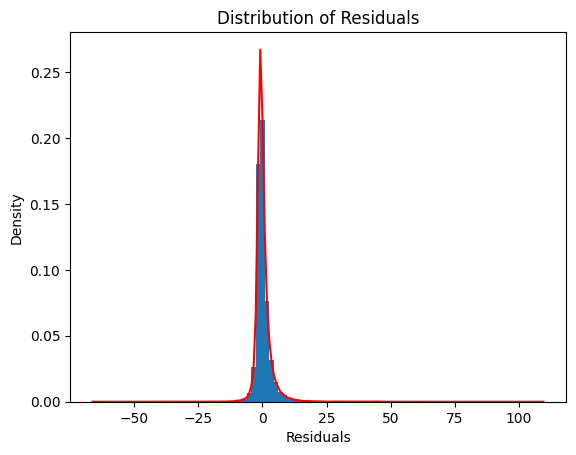

In [ ]:
plt.hist(residuals, bins=100, density=True)
sns.kdeplot(residuals, color='r')
plt.xlabel('Residuals')
plt.ylabel('Density')  # Since density=True, y-axis represents density
plt.title('Distribution of Residuals')
plt.show()

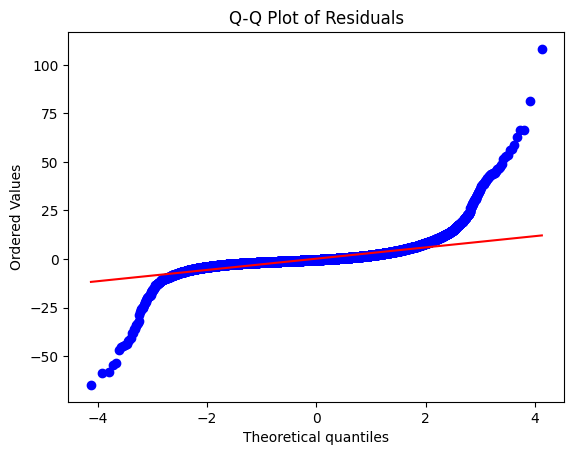

In [ ]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Residuals look Gaussian (fail to reject H0)')
else:
    print('Residuals do not look Gaussian (reject H0)')


Shapiro-Wilk Test: Statistics=0.626, p=0.000
Residuals do not look Gaussian (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


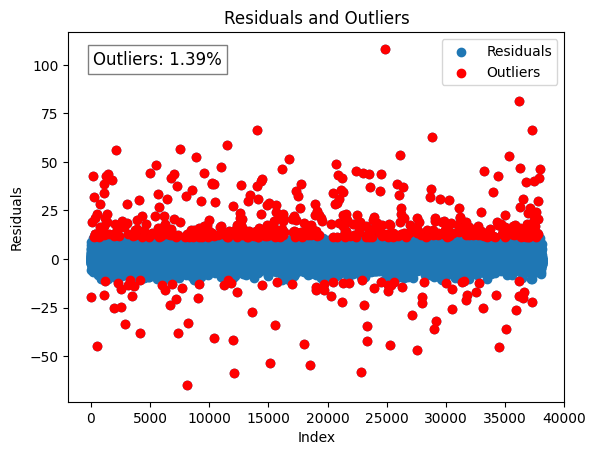

In [ ]:
residuals = np.array(residuals)

# Calculate z-scores of the residuals
z_scores = np.abs(stats.zscore(residuals))

# Find indices of outliers
outliers = np.where(z_scores > 3)[0]  # Extract the array of indices
percentage_outliers = (len(outliers) / len(residuals)) * 100

# Plot residuals
plt.scatter(range(len(residuals)), residuals, label='Residuals')

# Plot outliers
plt.scatter(outliers, residuals[outliers], color='red', label='Outliers')

plt.text(0.05, 0.95, f'Outliers: {percentage_outliers:.2f}%', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Label the plot
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals and Outliers')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

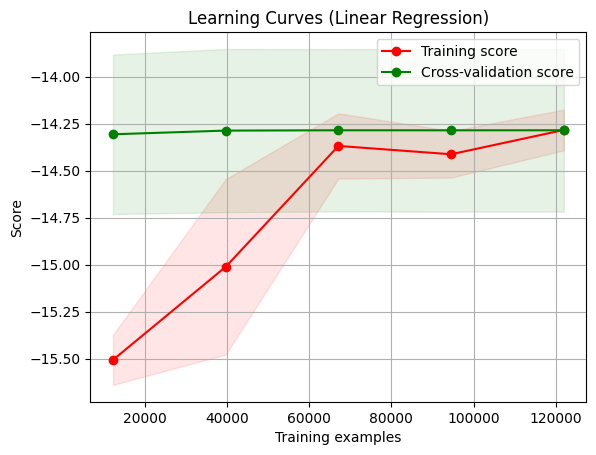

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

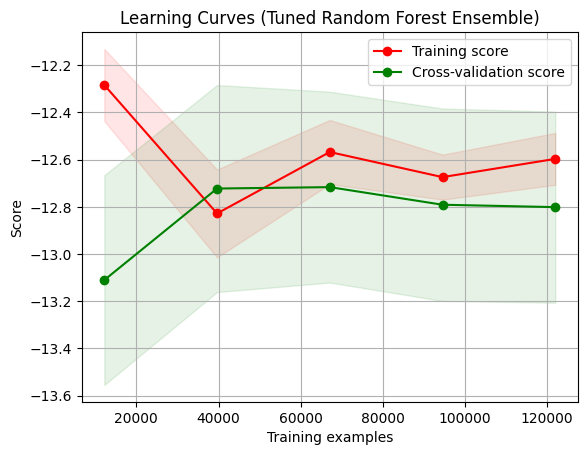

In [ ]:
title = "Learning Curves (Linear Regression)"
plot_learning_curve(linear_regressor, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

title = "Learning Curves (Tuned Random Forest Ensemble)"
plot_learning_curve(best_rf, title, X_train, y_train, cv=5, n_jobs=-1)

plt.savefig('Learning_curve.png')
files.download('Learning_curve.png')

plt.show()